# Getting and Knowing Your Data

## Chipotle data

### Passo 1 (Importar as bibliotecas)

In [1]:
import numpy as np
import pandas as pd

### Passo 2 (Copiar a URL dos dados para uma variável)

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
url

'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Passo 3 (Criar uma variável chipo com o conteúdo da url no formato de dataframe)

Para isso temos que usar o comando `pd.read_csv`!


O parâmetro __sep__ no comando `pd.read_csv` do Pandas é usado para especificar o delimitador que separa os valores nas colunas de um arquivo CSV. O delimitador padrão é a vírgula (,), mas muitos arquivos CSV podem usar outros caracteres como tabulações (\t), pontos e vírgulas (;), ou espaços ( ).

In [3]:
chipo = pd.read_csv(url, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Passo 4 (Verificar os 10 primeiros dados)

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Passo 5 (Verificar as informações do datase)

In [5]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Passo 6 (Verificar o número de linhas e colunas)

Caso queiramos visualizar apenas linhas ou colunas, utilizamos `.shape[0]` para linhas e `.shape[1]` para colunas

In [6]:
chipo.shape

(4622, 5)

### Passo 7 (Printar o nome de todas as colunas)

In [7]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Passo 8 (Como o dataset está indexado?)

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Passo 9 (Qual foi o item mais pedido?)

Para isso primeiro precisamos __agrupar__ todos os itens usando `.groupby('coluna')` onde no caso a coluna que queremos é a de nomeação dos itens. Depois, utilizamos `.sum()` para __somar as quantidades__ de cada item e todas as outras informações desse item. Para finalmente conseguir __ordenar os dados por quantidade em ordem decrescente__ utilizando `.sort_values(['coluna'], ascending=False)`

In [9]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


### Passo 10 (Para o item mais pedido, quantos itens foram pedidos?)

Podemos fazer isso usando o método `.idxmax()` para encontrar o índice da linha que possui o __valor máximo__ na coluna __quantity__. Após isso utilizamos o comando `.loc[parametro1, 'parametro2']` para acessar um valor específico no DataFrame. O __parametro 1__ neste caso é o item e o __parametro 2__ é a coluna do item que queremos verificar o valor, como se fosse uma batalha naval.



In [10]:
most_ordered_item = c['quantity'].idxmax()
most_ordered_quantity = c.loc[most_ordered_item, 'quantity']
most_ordered_quantity

761

### Passo 11 (Qual foi o item mais pedido na coluna choice_description?)

In [11]:
c = chipo.groupby('choice_description')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)['quantity']
c.head(1)

choice_description
[Diet Coke]    159
Name: quantity, dtype: int64

### Passo 12 (Quantos itens foram encomendados no total?)

Para isso somamos a coluna de quantidade de itens para cada pedido.
Esse formato irá se repetir sempre que quisermos somar o valor de uma coluna ao longo do row de dados: `.coluna.sum()`

In [12]:
total = chipo.quantity.sum()
total

4972

### Passo 13 (Transforme o preço do item em um float)

In [13]:
chipo.item_price.dtype

dtype('O')

In [14]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [15]:
chipo.item_price.dtype

dtype('float64')

### Passo 14 (Qual foi a receita do período no conjunto de dados?)

Diferente da quantidade de pedidos, este somatório da receita total precisa levar em conta dois fatores: o __preço do item__ e a __quantidade de itens levados__ por isso o somatório total será dado por uma multiplicação desses dois parâmetros para cada linha que ele aparece.

In [16]:
total = (chipo['quantity']* chipo['item_price']).sum()
total

39237.02

### Passo 15 (Quantos pedidos e itens diferentes foram feitos no período?)

Podemos utilizar dois métodos, um usando o `idmax()` ja visto;

E outro utilizando o método `.coluna.value_counts().count()`. Este método conta a frequência de cada valor único de uma coluna. O resultado é uma Series onde o índice são os parâmetros únicos da coluna e ao lado são as contagens de aparições desses parâmetros ao longo do row de dados, utilizados posteriormente no `count()` para contar o total de parâmetros sem repeti-los. Este método facílita bastante quando temos que fazer a contagem de algo __sem considerar valores repetidos__.

In [17]:
orders = chipo.order_id.value_counts()
orders

order_id
926     23
1483    14
205     12
759     11
1786    11
        ..
768      1
341      1
1048     1
94       1
1199     1
Name: count, Length: 1834, dtype: int64

In [18]:
orders = chipo.order_id.value_counts().count()
orders

1834

In [19]:
itens = chipo.item_name.value_counts()
itens

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [20]:
itens = chipo.item_name.value_counts().count()
itens

50

# Filtering & Sorting

## Chipotle

### Passo 1 (Importar as bibliotecas)

In [21]:
import pandas as pd
import numpy as np

### Passo 2 (Copiar a URL dos dados para uma variável)

In [22]:
url2 = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
url2

'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Passo 3 (Criar uma variável chipo com o conteúdo da url no formato de dataframe)

In [23]:
chipo2 = pd.read_csv(url2, sep = '\t')
chipo2

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Passo 4 (Quantos produtos custam mais do que $10.00?)


Pelo que podemos ver, a coluna `item_price` no DataFrame chipo2 tem o tipo object, o que significa que ela contém valores que não são diretamente interpretados como numéricos (possivelmente strings). Para realizar operações numéricas, precisamos __converter esses valores em números__.

Geralmente, a coluna de preços pode conter símbolos de moeda ou outros caracteres que precisam ser removidos antes da conversão. Vamos primeiro __remover qualquer símbolo de moeda__ e depois converter a coluna para tipo numérico.

In [24]:
chipo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [25]:
# Remover símbolos de moeda e converter para numérico
chipo2['item_price'] = chipo2['item_price'].str.replace('$', '').astype(float)

chipo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [26]:
chipo2.query("item_price > 10")

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75


### Passo 5 (Imprimir um quadro de dados com apenas duas colunas item_name e item_price)

In [27]:
chipo2[['item_name','item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


### Passo 6 (Ordenando pelo nome do item)

Para isso usamos o método `.sort_values(by = "coluna")` podemos fazer isso para todas as colunas.

In [28]:
chipo2.sort_values(by = "item_name")

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### Passo 7 (Qual foi a quantidade do item mais caro encomendado?)

Para exibir apenas o valor da quantidade, podemos usar a propriedade `.values` do DataFrame, junto com o índice apropriado para extrair o valor. Usamos `[0][0]` para acessar o primeiro elemento do array resultante, pois o método retorna um array.

In [29]:
item_caro = chipo2['item_price'].idxmax()
chipo2.loc[item_caro, 'item_price']

44.25

In [30]:
quantidade = chipo2.query("item_price == 44.25")
valor_quantidade = quantidade[['quantity']].values[0][0]
valor_quantidade

15

### Passo 8 (Quantas vezes foi pedido uma Salada Vegetariana?)

In [31]:
veganas = chipo2.query("item_name == 'Veggie Salad Bowl'")
veganas

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [32]:
veganas.order_id.value_counts().count()

18

### Passo 9 (Quantas vezes alguém pediu mais de um refrigerante em lata?)

In [33]:
soda = chipo2[(chipo2.item_name == "Canned Soda") & (chipo.quantity > 1)]
soda.order_id.value_counts().count()

18

# GroupBy

## Alcohol_Consumptior

### Passo 1 (Importar as bibliotecas)

In [34]:
import pandas as pd
import numpy as np

### Passo 2 (Copiar a URL dos dados para uma variável)

In [35]:
url3 = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
url3

'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

### Passo 3 (Criar uma variável drinks com o conteúdo da url no formato de dataframe)

In [36]:
drinks = pd.read_csv(url3)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Passo 4 (Qual continente bebe mais cerveja em média?)

Para obtermos essas estatísticas, primeiramente __agrupamos os dados__ por continentes, depois __identificamos qual coluna queremos retirar os dados__ que no nosso caso é a `.beer_servings`, e por fim, tiramos a __média dos valores__ com o método `.mean()`.

In [37]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### Passo 5 (Para cada continente imprima as estatísticas de consumo de vinho)

Para este caso, selecionamos a coluna `.wine_servings`e utilizamos o método `describe()`para gerar as estatísticas gerais de cada continente.

In [38]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Passo 6 (Imprima o consumo médio de álcool por continente para cada coluna)

Para isso usamos __dois conjuntos de colchetes__ para __selecionar múltiplas colunas de um DataFrame__ no Pandas.

Poderiamos também selecionar um intervalo de colunas usando índices em vez de nomes de colunas com oo método `.iloc`, para selecionar colunas por seus índices de posição.

In [39]:
drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']].mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Passo 7 (Imprima o consumo mediano de álcool por continente para cada coluna)

In [40]:
drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']].median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Passo 8 (Imprima os valores médio, mínimo e máximo para consumo de bebidas espirituosas)

Para isso, após selecionar a devida coluna, devemos utilizar o método `.agg([funções])` para __aplicar múltiplas funções de agregação__.

In [41]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


# Apply

## Students_Alcohol_Consumption

### Passo 1 (Importar as bibliotecas)

In [42]:
import pandas as pd
import numpy as np

### Passo 2 (Copiar a URL dos dados para uma variável)

In [43]:
url4 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
url4

'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'

### Passo 3 (Criar uma variável "df" com o conteúdo da url no formato de dataframe)

In [44]:
df = pd.read_csv(url4)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Passo 4 (Para efeitos deste exercício, corte o dataframe de 'school' até a coluna 'guardian')

Para isso, utilizamos o comando `.loc[linhas,colunas]`onde as linhas serão __todas__ e as __colunas serão delimitadas__ de school até guardian.

Este método é parecido com o `.iloc`, porém, `.iloc` é usado para selecionar com base em __índices de posição__ (inteiros), não com base em rótulos de colunas.

In [45]:
df_cut = df.loc[:, 'school':'guardian']
df_cut

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother


### Passo 5 (Crie uma função lambda que colocará as strings em maiúscula)

A função lambda pode ser criada facilmente utilizando o seguinte método: `lambda x: x.função()`.

Criaremos uma variável chamada __capitalizer__ para armazenar essa função.

In [46]:
capitalizer = lambda x: x.capitalize()

### Passo 6 (Capitalize Mjob e Fjob)

Para fazer isso, utilizaremos o método `.apply(variável_funcao)` nas colunas que queremos. Este método __aplica a função de lambda__ que criamos, __pegando como parâmetro a variável que guarda essa função__ (esse método não retorna o DataFrame com as modificações).

In [47]:
df_cut['Mjob'].apply(capitalizer)
df_cut['Fjob'].apply(capitalizer)

0       Teacher
1         Other
2         Other
3      Services
4         Other
         ...   
390    Services
391    Services
392       Other
393       Other
394     At_home
Name: Fjob, Length: 395, dtype: object

### Passo 7 (Imprima os últimos elementos do conjunto de dados)

In [48]:
df_cut.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father


### Passo 8 ( Você notou que o dataframe original ainda está em letras minúsculas? Por que é que? Corrija-o e coloque Mjob e Fjob em maiúscula)

Para retornar o __DataFrame modificado__ podemos utilizar o mesmo método __separadamente__ para cada coluna, ou então, utilizar o método `.applymap(variável_funcao)` para __fazer tudo em uma linha__. Com isso, devemos __igualar__ as colunas que queremos mudar a essas mesmas colunas aplicadas ao método.

In [49]:
df_cut[['Fjob', 'Mjob']] = df_cut[['Fjob', 'Mjob']].applymap(capitalizer)
df_cut

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,Services,Services,course,other
391,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother
392,MS,M,21,R,GT3,T,1,1,Other,Other,course,other
393,MS,M,18,R,LE3,T,3,2,Services,Other,course,mother


### Passo 9 (Crie uma função chamada maioria que retorna um valor booleano para uma nova coluna chamada legal_drinker [considere maioridade como maior de 17 anos])

Para __definir uma função genérica de x__, utilizamos o seguinte formato:

`def funcao(x):`

    instruções

E para __criar uma nova coluna em função de outra__ utiizamos: `df['nova_coluna'] = df['coluna_base'].apply(funcao)`. No nosso caso, __x são as idades__ que temos na coluna `age`.

In [50]:
def majority(x):
    if x > 17:
        return True
    else:
        return False

In [51]:
df_cut['legal_drinker'] = df_cut['age'].apply(majority)
df_cut.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


### Passo 10 (Multiplique cada número do conjunto de dados por 10)

In [52]:
def times10(x):
    if type(x) is int:
        return 10 * x
    return x

In [53]:
df_cut.applymap(times10).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False


# Merge

## MPG Cars

### Passo 1 (Importar as bibliotecas)

In [54]:
import pandas as pd
import numpy as np

### Passo 2 e 3(Copiar as URLs dos dados para duas variáveis e imprimir os dados)

In [55]:
cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

print(cars1.head())
print(cars2.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model   
0  18.0          8           307        130    3504          12.0     70  \
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11   
0       1  chevrolet chevelle malibu         NaN          NaN          NaN  \
1       1          buick skylark 320         NaN          NaN          NaN   
2       1         plymouth satellite         NaN          NaN          NaN   
3       1              amc rebel sst         NaN          NaN          NaN   
4       1                ford torino         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN

### Passo 4 (Ops, parece que nosso primeiro conjunto de dados tem algumas colunas em branco sem nome, conserte carros1)

In [56]:
cars1 = cars1.loc[:, "mpg":"car"]
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


### Passo 5 (Qual é o número de linhas e colunas em cada conjunto de dados?)

In [57]:
print(cars1.shape)
print(cars2.shape)

(198, 9)
(200, 9)


### Passo 6 (Junte cars1 e cars2 em um único DataFrame chamado cars)

O método `append` não está mais disponível para objetos DataFrame no Pandas. Então, utilizaremos o método `pd.concat([data1, data2])` para efetuar o merge. `ignore_index=True` no argumento do método serve para deixar os índices no formato correto.

In [58]:
cars = pd.concat([cars1, cars2], ignore_index=True)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97,52,2130,24.6,82,2,vw pickup
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120,79,2625,18.6,82,1,ford ranger


### Passo 7 e 8 (Ops, falta uma coluna chamada proprietários. Crie uma série de números aleatórios de 15.000 a 73.000 para criarmos uma coluna com estes dados)

In [59]:
nr_owners = np.random.randint(15000, high=73001, size=398, dtype='l')
cars['owners'] = nr_owners
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,41878
394,44.0,4,97,52,2130,24.6,82,2,vw pickup,27134
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage,27961
396,28.0,4,120,79,2625,18.6,82,1,ford ranger,68652
397,31.0,4,119,82,2720,19.4,82,1,chevy s-10,50056


# Stats

## US_Baby_Names

### Passo 1,2,3

In [60]:
import pandas as pd
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


### Passo 4 (Olhe as 10 primeiras entradas)

In [61]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Passo 5 (Exclua a coluna 'Unnamed: 0' e 'Id')

In [62]:
baby_names = baby_names.loc[:, 'Name':'Count']
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Passo 6 (Existem mais nomes masculinos ou femininos no conjunto de dados?)

In [63]:
meninas = baby_names.query("Gender == 'F'")
contF = meninas.value_counts().count()

meninos = baby_names.query("Gender == 'M'")
contM = meninos.value_counts().count()

if contF > contM:
    print("Mais meninas")
else:
    print("Mais meninos")

Mais meninas


### Passo 7 (Agrupe o conjunto de dados por nome e atribua nomes)

Para agrupar os dados, utilizamos o método `.groupby("Coluna").sum()`. Quando usamos `groupby("Name")`, o DataFrame é agrupado com base nos nomes. Cada grupo conterá todas as entradas com o mesmo nome.

Ao aplicar `sum()`, iremos somar os valores da coluna 'Count' para cada grupo de nomes. Isso é necessário para saber o número total de ocorrências de cada nome.

In [64]:
# Deletar as colunas
baby_names = baby_names[['Name','Count']]

# Agrupar
names = baby_names.groupby("Name").sum()

# Printar
names.head()

,Count
Name,
Aaban,12
Aadan,23
Aadarsh,5
Aaden,3426
Aadhav,6


### Passo 8 (Quantos nomes diferentes existem no conjunto de dados?)

In [65]:
names.count()

#ou

len(names)

17632

### Passo 9 (Qual é o nome com mais ocorrências?)

Para obtermos uma lista com os nomes de maior ocorrência, utilizamos o método para ordenar os valores de Count. Caso queiramos apenas o nome com maior ocorrência usamos `.idmax()` na coluna Count.

In [66]:
names.Count.idxmax()

'Jacob'

### Passo 10 (Quantos nomes diferentes têm menos ocorrências?)

Para isso utilizamos `len()`e uma máscara para `names` com a condição de que __apenas os nomes com contagens mínimas apareçam__.

In [67]:
len(names[names.Count == names.Count.min()])

2578

### Passo 11 (Qual é a ocorrência mediana dos nomes?)

In [68]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
...,...
Sriram,49
Trinton,49
Vita,49


### Passo 12 (Qual é o desvio padrão dos nomes?)

In [69]:
names.Count.std()

11006.06946789057

### Passo 13 (Obtenha um resumo com média, mínimo, máximo, padrão e quartis)

In [70]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


# Visualization

## Chipotle

### Passo 1,2,3

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

chipo3 = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo3

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Passo 4 (Ver os 10 primeiros dados)

In [72]:
chipo3.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Passo 5 (Criar um histograma com os 5 itens mais comprados)

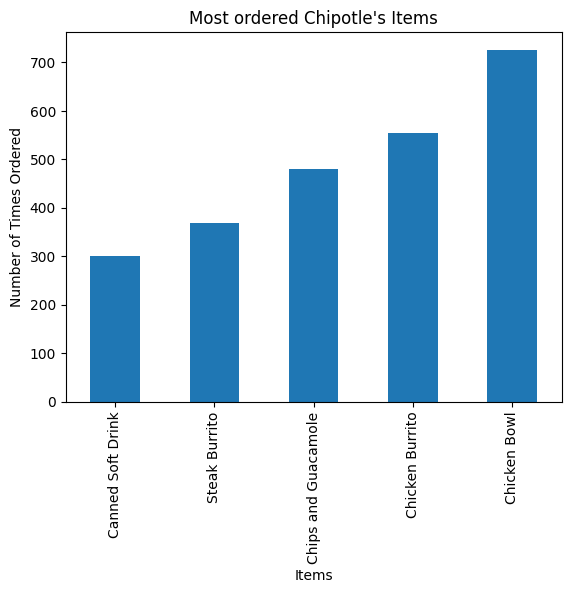

In [73]:
# Em nosso "x" teremos os nomes dos produtos
x = chipo3.item_name

# use a classe Counter das coleções para criar um dicionário com chaves (texto) e frequência
letter_counts = Counter(x)

# converter o dicionário em um DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# ordenar os valores da forma que queremos
df = df[0].sort_values(ascending = True)[45:50]

# criar o gráfico
df.plot(kind='bar')

# títulos e legendas
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# resultado
plt.show()

### Passo 6 (Crie um gráfico de dispersão com o número de itens pedidos por preço do pedido)

(0.0, 36.7)

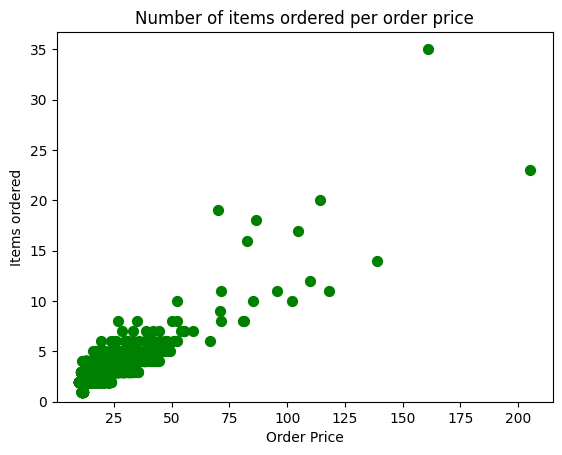

In [74]:
# criação da lista de preços, e conversão dos valores
chipo3.item_price = [float(value[1:-1]) for value in chipo3.item_price] 

# agrupamento e soma dos dados
orders = chipo3.groupby('order_id').sum()

# cria o gráfico de dispersão ("s" é o tamanho e "c" a cor)
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# títulos e legendas
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

# Creating Series and DataFrames

## Pokemon

### Passo 1 (Importar as bibliotecas)

In [75]:
import pandas as pd

### Passo 2 (Criar um DataFrame usando como base o do caderno de exercícios)

Segue sempre este modelo `{"coluna1": [infos1], "coluna2": [infos2]...}`

In [76]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### Passo 3 (Ler o DataFrame e colocar em uma variável chamada pokemon)

In [77]:
pokemon = pd.DataFrame(raw_data)
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### Passo 4 (Ops... parece que as colunas do DataFrame estão em ordem alfabética. Coloque a ordem das colunas como nome, tipo, hp, evolução, pokedex)

In [78]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Passo 5 (Adicione outra coluna chamada local e insira o que você tem em mente)

In [79]:
pokemon.loc[:, 'local'] = ['SP', 'RJ', 'SC', 'PR']
pokemon

/tmp/ipykernel_2987806/219771955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon.loc[:, 'local'] = ['SP', 'RJ', 'SC', 'PR']


,name,type,hp,evolution,pokedex,local
0,Bulbasaur,grass,45,Ivysaur,yes,SP
1,Charmander,fire,39,Charmeleon,no,RJ
2,Squirtle,water,44,Wartortle,yes,SC
3,Caterpie,bug,45,Metapod,no,PR


### Passo 6 (Apresente o tipo de cada coluna)

In [80]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
local        object
dtype: object

# Time Series

## Apple Stock

### Passo 1,2,3

In [81]:
import pandas as pd
import numpy as np

# visualização
import matplotlib.pyplot as plt
%matplotlib inline

apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

apple.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Passo 4 (Confira o tipo das colunas)

In [82]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Passo 5 (Transforme a coluna Data em um tipo datetime)

In [83]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Passo 6 (Defina a data como índice)

In [84]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Passo 7 (Verificar se existe alguma data duplicada)

Para isso utilizamos o método `.index.is_unique`. Se o resultado for __True__ significa que não há duplicatas. Se o resultado for __False__ significa que há duplicatas.

In [85]:
apple.index.is_unique

True

### Passo 8 (Ops... parece que o índice é da data mais recente. Faça da primeira entrada a data mais antiga)

In [86]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Passo 9 (Obtenha o último dia útil de cada mês)

O método `.resample` é usado para reamostrar os dados em uma nova frequência de tempo. O argumento 'BM' especifica que a reamostragem deve ser feita no __"último dia útil de cada mês" (Business Month end)__.

Depois de reamostrar os dados para o último dia útil de cada mês, o método `mean()` calcula a média dos valores dentro de cada intervalo de reamostragem (neste caso, dentro de cada mês).

In [87]:
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Passo 10 (Qual é a diferença em dias entre o primeiro dia e o mais antigo)

In [88]:
(apple.index.max() - apple.index.min()).days

12261

### Passo 11 (Quantos meses nos dados temos?)

In [89]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Passo 12 (Plote o valor 'Adj Close'. Defina o tamanho da figura para 13,5 x 9 polegadas)

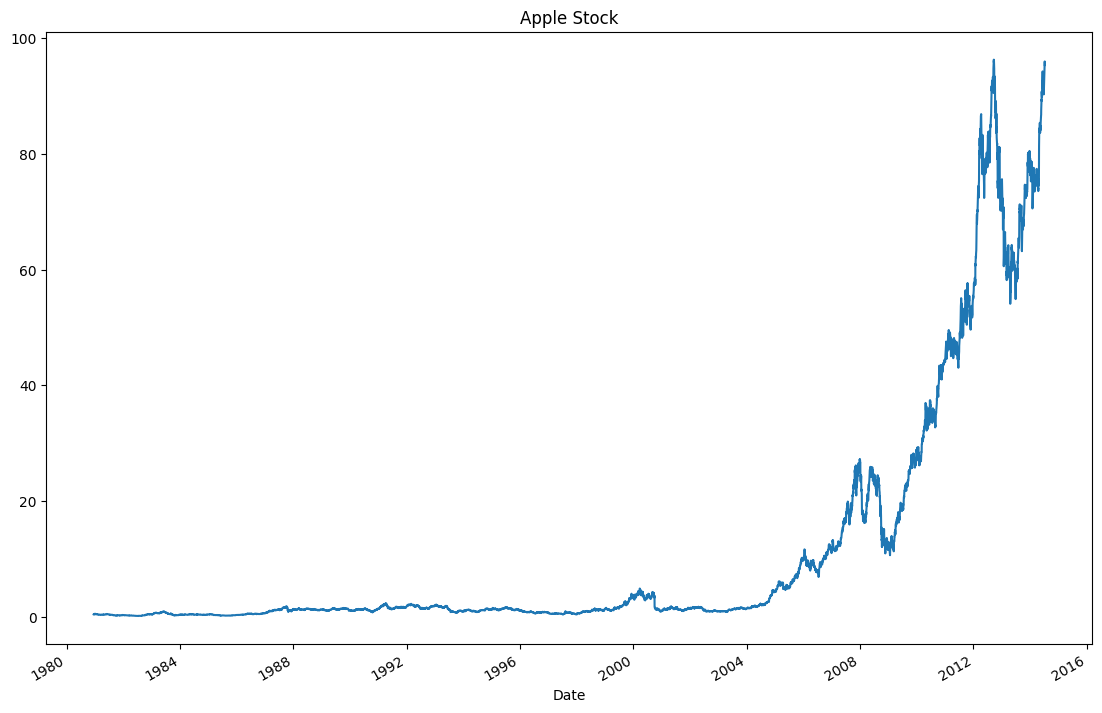

In [90]:
# faz o gráfico e atribui-o a uma variável
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# altera o tamanho do gráfico
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)